<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/regresaolinear%2Cparaescola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

calculo de porcentaje de alumnos para saber cual porcentaje aprobara el año teniendo en referencia dos años anteriores

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
aluno= pd.read_excel('/content/C├│pia de aprovacao_alunos (1).xlsx')

In [10]:
aluno.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


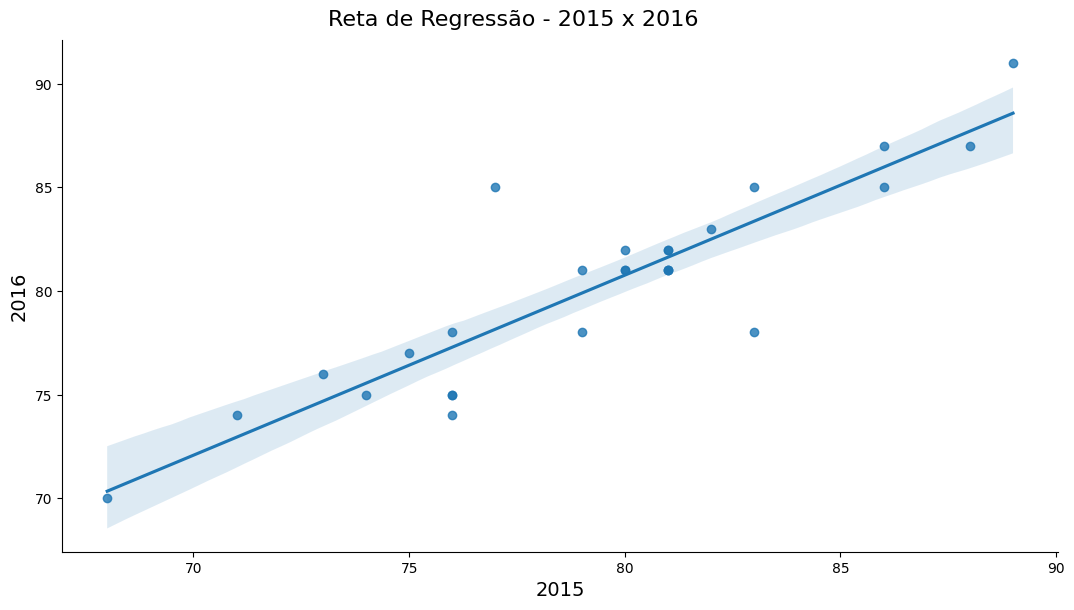

In [11]:
#Crie um gráfico com a reta de regressão
ax = sns.lmplot(x="ano_2015", y="ano_2016", data=aluno)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - 2015 x 2016', fontsize=16, y=1.02)
ax.set_xlabels("2015", fontsize=14)
ax.set_ylabels("2016", fontsize=14)
ax;

In [13]:
#Tire a correlação entre as variáveis
aluno.corr()

<ipython-input-13-391b028eb4c8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  aluno.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [16]:
#Printe o resultado OLS Regression para entender o R^2, Intercepto e o parâmetro da variável explicativa
import statsmodels.api as sm
Y = aluno.ano_2016
X = sm.add_constant(aluno.ano_2015)

In [17]:
resultado_regressao = sm.OLS(Y, X).fit()

In [18]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           3.02e-10
Time:                        18:35:39   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [20]:
#Crie a predição para a variável Y

aluno['Y_previsto'] = resultado_regressao.predict()
aluno

,UF,ano_2015,ano_2016,Y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089
5,Amapa,76,75,77.291450
6,Tocantins,81,82,81.632053
7,Maranhao,81,81,81.632053
8,Piaui,80,81,80.763932
9,Ceara,86,85,85.972655


In [22]:
#Crie uma coluna com os resultados do resíduo

aluno["residuo"] = aluno["Y_previsto"] - aluno["ano_2016"]
aluno.head()

,UF,ano_2015,ano_2016,Y_previsto,residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911
